<a id='toc'></a>
## Table of Contents

* [1. About the project](#about_project)
* [2. Starter](#starter)
    * [2.1 Import libraries](#import_libraries)
    * [2.2 Load and have a peak at data](#load_data)

[back to TOC](#toc)
<a class='anchor' id='about_project'></a>
### 1. About the project:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

#### Notes from data source

*Data source:* https://archive.ics.uci.edu/ml/datasets/bank+marketing
(Also available at https://www.openml.org/d/1461 but has some differences due to data being processed a bit)

*Datafile to be used:* https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip

* 1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
* 2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.

##### Input variables:

*bank client data:*
* 1 - age (numeric)
* 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* 5 - default: has credit in default? (categorical: 'no','yes','unknown')
* 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
* 7 - loan: has personal loan? (categorical: 'no','yes','unknown')

*related with the last contact of the current campaign:*
* 8 - contact: contact communication type (categorical: 'cellular','telephone')
* 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

*other attributes:*
* 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* 14 - previous: number of contacts performed before this campaign and for this client (numeric)
* 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

*social and economic context attributes*
* 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
* 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
* 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
* 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
* 20 - nr.employed: number of employees - quarterly indicator (numeric)

##### Output variable (desired target)
* 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

**Citation:** [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

<a id='starter'></a>
### 2. Starter
[back to TOC](#toc)

<a id='import_libraries'></a>
#### 2.1 Import libraries
[back to TOC](#toc)

In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display

from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import xgboost as xgb

from sklearn.feature_extraction import DictVectorizer

from sklearn import preprocessing

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [49]:
#Install hvplot for interactive plots
# !pip install hvplot
# import hvplot.pandas

#Getting error while installing in EC2 instance

<a id='load_data'></a>
#### 2.2 Load and have a peek at the data
[back to TOC](#toc)

In [50]:
#datafile = '/kaggle/input/progetto-data-intensive-applications/bank-additional-full.csv'
datafile = 'bank-additional-full.csv'
df = pd.read_csv(datafile,delimiter=';')

In [51]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### 3. Exploratory Data Analysis

* Check if columns correctly classified as numerical and categorical *(sometimes numerical columns are marked categorical or vice versa)*
* Check for missing data and impute if data missing
* Check if any numerical features have extreme high values *(sometimes NaNs are coded as high number like 99999999)*
* Check cardinality of categorical features *(if very high cardinality then using one-hot encoding may create a lot of features)*
* Target variable analysis 
  - Convert categorical to binary *(since this dataset has target values of yes and no)*
  - Check whether there is class imbalance *(if class imbalance then accuracy should not be used as evaluation metric, rather roc_auc can be used)*
* Check if records where features have 'unknown' as values *(representative of NaNs)* can be deleted

Check if all the columns have correct data type (sometimes numerical columns are marked categorical or vice versa) 

In [52]:
df_head = df.head(2).T
dtypes = list(df.dtypes.values)
df_head.insert(loc=0,column='dtype',value=dtypes)
df_head

,dtype,0,1
age,int64,56,57
job,object,housemaid,services
marital,object,married,married
education,object,basic.4y,high.school
default,object,no,unknown
housing,object,no,no
loan,object,no,no
contact,object,telephone,telephone
month,object,may,may
day_of_week,object,mon,mon


**Observations:** The columns seem to be correctly typed

Check for missing data

In [53]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

**Observations:** No missing data

In [54]:
socio_econ_vars = ['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
for c in socio_econ_vars:
    print(f'{c} : {df[c].nunique()}')

emp.var.rate : 10
cons.price.idx : 26
cons.conf.idx : 26
euribor3m : 316
nr.employed : 11


In [55]:
#Numerical and Categorical features
t_num_cols = list(df.columns[df.dtypes != 'object'])
t_cat_cols = list(df.columns[df.dtypes == 'object'])
t_cat_cols.remove('y')
display(t_num_cols)
display(t_cat_cols)

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

Check if any of the numerical columns have significantly high values (sometimes NaNs are filled as something like 99999999)

In [56]:
df[t_num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [57]:
df[t_cat_cols].describe().T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


For categorical features, check cardinality (distinct values and their count)

In [58]:
#Number of distinct values for each categorical feature
df[t_cat_cols].nunique()

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
dtype: int64

In [59]:
#Distinct values and their count for each categorical feature
for c in t_cat_cols:
    print(c)
    display(df[c].value_counts())
    print()

job


admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


marital


married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


education


university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


default


no         32588
unknown     8597
yes            3
Name: default, dtype: int64


housing


yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


loan


no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


contact


cellular     26144
telephone    15044
Name: contact, dtype: int64


month


may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64


day_of_week


thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64


poutcome


nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

The cardinality for the categorical columns look to be ok, not too much

Converting target variable from having 'yes'/'no' to 1/0

In [60]:
df['y'] = (df['y'] == 'yes').astype(int)
df['y'].value_counts(normalize=True)

0    0.887346
1    0.112654
Name: y, dtype: float64

**Observations:** There is a high class imbalance in the target variable - 89% (no) - 11% (yes)

Many of the features have the value 'unknown' possibly since that piece of information was not available. Checking how many such records are there with unknowns and if removing these make sense.

In [61]:
df_copy1 = df.copy()
initial_records = df_copy1.shape[0]
for c in t_cat_cols:
    df_copy1.drop(df_copy1[df_copy1[c] == 'unknown'].index, inplace = True)
final_records = df_copy1.shape[0]
print(initial_records - final_records,(initial_records - final_records)/final_records)
del df_copy1

10700 0.35095775387037526


**Observations:** Thus totally there are 10700 records with atleast one feature having value as 'unknown'. This is 35% of the total data. So it does not make sense to remove this data. Will have to go ahead with the 'unknown' data

## 2. Split the data 

Splitting data as Train (70%), Val (20%), Test (10%)

In [62]:
df_full_train, df_test = train_test_split(df,test_size=0.1,shuffle=True,random_state=1)
df_train, df_val = train_test_split(df_full_train,test_size=0.22,shuffle=True,random_state=1)
print(f'train : {round(df_train.shape[0]/df.shape[0],2)}, val: {round(df_val.shape[0]/df.shape[0],2)}, test: {round(df_test.shape[0]/df.shape[0],2)}')

train : 0.7, val: 0.2, test: 0.1


In [63]:
y_train = df_train['y'].values
y_val = df_val['y'].values
y_test = df_test['y'].values

del df_train['y']
del df_val['y']
del df_test['y']

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

## 3. Feature Importance

Mutual information with categorical features

In [64]:
def mutual_info_subscribed_score(series):
    return mutual_info_score(series,df_full_train['y'])

In [65]:
mi = df_full_train[t_cat_cols].apply(mutual_info_subscribed_score)
mi.sort_values(ascending=False)

poutcome       0.030178
month          0.026438
contact        0.011244
job            0.009821
default        0.005719
education      0.002405
marital        0.001593
day_of_week    0.000269
housing        0.000053
loan           0.000006
dtype: float64

**Observations:** We can see that the features **marital, day_of_week, housing and loan** seem to not have any bearing on the outcome. Will check the score with and without these features.

Check global subscription rate relation to subscription rate feature wise

In [66]:
global_subscription_rate = round(df['y'].mean(),3)
print(global_subscription_rate)

0.113


In [67]:
cons_df_group = pd.DataFrame()

for c in t_cat_cols:
    df_group = df_full_train.groupby(c)['y'].agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_subscription_rate
    df_group['abs_diff'] = np.abs(df_group['mean'] - global_subscription_rate)
    df_group['ratio'] = df_group['mean'] / global_subscription_rate
    new_idx = [c+'_'+val for val in list(df_group.index.values)]
    df_group.index = new_idx
    cons_df_group = pd.concat([cons_df_group,df_group])
display(cons_df_group.sort_values(by='ratio',ascending=False))

,mean,count,diff,abs_diff,ratio
poutcome_success,0.649837,1228,0.536837,0.536837,5.750771
month_dec,0.503067,163,0.390067,0.390067,4.451925
month_mar,0.502033,492,0.389033,0.389033,4.442766
month_sep,0.445298,521,0.332298,0.332298,3.940686
month_oct,0.439137,649,0.326137,0.326137,3.886169
job_student,0.317542,781,0.204542,0.204542,2.810103
job_retired,0.251969,1524,0.138969,0.138969,2.229810
month_apr,0.196632,2375,0.083632,0.083632,1.740102
education_illiterate,0.176471,17,0.063471,0.063471,1.561687
marital_unknown,0.154930,71,0.041930,0.041930,1.371058


Co-relation of numerical features with target variable

In [68]:
df_full_train[t_num_cols].corrwith(df_full_train['y']).sort_values()

nr.employed      -0.351794
pdays            -0.323898
euribor3m        -0.304073
emp.var.rate     -0.295685
cons.price.idx   -0.135393
campaign         -0.065985
age               0.032834
cons.conf.idx     0.059965
previous          0.227109
duration          0.402982
dtype: float64

**Observations:** We can see that most of the numerical features have correlation with target unlike categorical variables, where almost all categorical variables had lower mutual information score with target. The features age, duration, previous and cons.conf.idx have a postivie correlation, while campaign, pdays, emp.var.rate, cons.price.idx, euribor3m and nr.employed have negative correlation

To check absolute correlations (without considering if it is postive or negative, but simply how highly they are correlated)

In [69]:
np.abs(df_full_train[t_num_cols].corrwith(df_full_train['y'])).sort_values(ascending=False)

duration          0.402982
nr.employed       0.351794
pdays             0.323898
euribor3m         0.304073
emp.var.rate      0.295685
previous          0.227109
cons.price.idx    0.135393
campaign          0.065985
cons.conf.idx     0.059965
age               0.032834
dtype: float64

**Observations:** All the numerical features seem to be important for predicting the outcome. 

The duration will not be considered in the model performance and the final model, based on the guidelines that were given with the dataset and mentioned below.
- *Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.*

Lets look at correlations of numerical feature with other numerical features

In [70]:
df_full_train[t_num_cols].corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.004604,0.006331,-0.032662,0.021780,0.001091,0.002594,0.128808,0.011997,-0.017040
duration,-0.004604,1.000000,-0.070247,-0.045698,0.017119,-0.023561,0.008560,-0.007399,-0.028700,-0.040847
campaign,0.006331,-0.070247,1.000000,0.052496,-0.078665,0.150809,0.126889,-0.014038,0.135644,0.144573
pdays,-0.032662,-0.045698,0.052496,1.000000,-0.584429,0.269762,0.078340,-0.091576,0.296081,0.371733
previous,0.021780,0.017119,-0.078665,-0.584429,1.000000,-0.420562,-0.203582,-0.049758,-0.454793,-0.501685
emp.var.rate,0.001091,-0.023561,0.150809,0.269762,-0.420562,1.000000,0.775054,0.196202,0.972273,0.906672
cons.price.idx,0.002594,0.008560,0.126889,0.078340,-0.203582,0.775054,1.000000,0.058611,0.687705,0.521113
cons.conf.idx,0.128808,-0.007399,-0.014038,-0.091576,-0.049758,0.196202,0.058611,1.000000,0.277869,0.100764
euribor3m,0.011997,-0.028700,0.135644,0.296081,-0.454793,0.972273,0.687705,0.277869,1.000000,0.945057
nr.employed,-0.017040,-0.040847,0.144573,0.371733,-0.501685,0.906672,0.521113,0.100764,0.945057,1.000000


<AxesSubplot:>

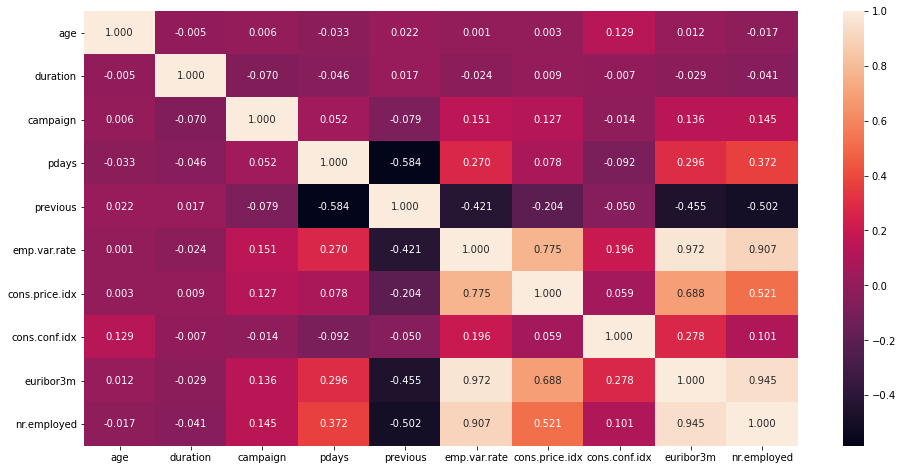

In [71]:
plt.figure(figsize=(16, 8))
sns.heatmap(df_full_train[t_num_cols].corr(), annot=True, fmt='.3f')

**Observations:** We can see that some of the features have good correlation (>0.75) - like - emp.var.rate, nr.employed, euribor3m, cons.price.idx are co-related to each other. This makes sense as all these are social and economic context attributes.

### 4. Baseline model

Will check performance of baseline model using LogisticRegression with default parameters and evaluating using roc_auc_score (since the target variable has class imbalance). Will check the scores with and without the feature 'duration'

Score with feature 'duration'

In [72]:
#Save all scores into a pandas dataframe so that we can have a comparative study across experiments

#Construct of this dataframe will be like below example
#"algo", "desc", "score", "diff"
#"logisticregression", "description of the experiment", 0.6896, 0.0243

exp_columns = ["algo", "desc", "score", "diff"]
exp_scores = pd.DataFrame(columns = exp_columns)

In [73]:
dv = DictVectorizer(sparse=False)
model = LogisticRegression(solver='liblinear',random_state=42)

In [74]:
dict_train = df_train.to_dict(orient='records')
X_train = dv.fit_transform(dict_train)
model.fit(X_train,y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [75]:
dict_val = df_val.to_dict(orient='records')
X_val = dv.transform(dict_val)
y_pred = model.predict_proba(X_val)[:,1]
this_auc = roc_auc_score(y_val,y_pred)
print(this_auc)
# score_entry = {"algo": "logisticregression", "desc": "all features including duration", "score": this_auc}
# exp_scores = exp_scores.append(score_entry,ignore_index=True)

0.9317413173947264


Removing the feature 'duration' and checking the score

In [76]:
df_train_copy = df_train.copy()
del df_train_copy['duration']
dict_train_copy = df_train_copy.to_dict(orient='records')
X_train_copy = dv.fit_transform(dict_train_copy)
model.fit(X_train_copy,y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [77]:
#Experiment 0

df_val_copy = df_val.copy()
del df_val_copy['duration']
dict_val_copy = df_val_copy.to_dict(orient='records')
X_val_copy = dv.transform(dict_val_copy)
y_pred_2 = model.predict_proba(X_val_copy)[:,1]
baseline_auc = roc_auc_score(y_val,y_pred_2)
print(baseline_auc)
score_entry = {"algo": "logisticregression", "desc": "baseline score. all features excluding duration", "score": baseline_auc, "diff": 0}
exp_scores = exp_scores.append(score_entry,ignore_index=True)

0.76951656889512


We will consider this score (without the duration feature) as the baseline score. We will now see how we can improve the score. Later we will try using different models and then again see for those, how we can further improve the score.

Deleting 'duration' feature from all the dataframes

In [78]:
del df_train['duration']
del df_full_train['duration']
del df_val['duration']
del df_test['duration']

### 5. Improvement over baseline

Idea here is to do more experiments using the same algorithm used in baseline to find methods to improve the score. Then we will try to tune the paramaters of this model to further improve the score. After having worked with this model, we will look at other algorithms and compare the scores, then we will also tune the hyperparameters for these other models. Finally we will compare all the results to select the best model and parameters, which we will use to then train the full_train dataset and evaluate finally on the test dataset

#### 5.1 Logistic Regression
##### 5.1.1 Experiments to improve the score using LogisticRegression
* Check scores by dropping less important features based on EDA
* Check effect on score by dropping one feature at a time

##### 5.1.2 Model tuning for LogisticRegression
* Check various paramaters

#### 5.2 DecisionTreeClassifier

#### 5.3 RandomForestClassifier

#### 5.4 XGBoost

Let us look at the coefficients of the trained Logistic regression model to see which are the features that do not help much (coefficient values close to 0)

In [79]:
# features_names = dv.get_feature_names()
# df_ = pd.DataFrame()
# df_['features'] = features_names
# df_['coef'] = clf.coef_[0].round(2)
# df_ = df_.sort_values('coef').reset_index(drop=True)

# scat1 = df_.hvplot(
#                 x="coef",
#                 y="features",
#                 kind="line",
#                 size=70, 
#                 height=800, width=1200,
#                 alpha=0.7,
#                 title="features vs coef"
# )
# scat1

In [80]:
features_names = dv.get_feature_names()
df_ = pd.DataFrame()
df_['features'] = features_names
df_['coef'] = model.coef_[0].round(3)
df_['abs_coef'] = np.abs(model.coef_[0].round(3))
df_ = df_.sort_values('abs_coef').reset_index(drop=True)
df_

,features,coef,abs_coef
0,default=yes,-0.000,0.000
1,loan=yes,0.000,0.000
2,job=management,-0.001,0.001
3,job=self-employed,0.001,0.001
4,job=technician,0.001,0.001
...,...,...,...
57,poutcome=failure,-0.158,0.158
58,contact=telephone,-0.183,0.183
59,contact=cellular,0.186,0.186
60,cons.price.idx,0.371,0.371


In [81]:
exp_scores

,algo,desc,score,diff
0,logisticregression,baseline score. all features excluding duration,0.769517,0


Based on out EDA, we had seen that the features 'loan','housing','day_of_week','marital' had very less mutual information with the target. Let us check the score of model trained without these features.

In [82]:
df_train_copy = df_train.copy()
df_train_copy.drop(['loan','housing','day_of_week','marital'],axis=1,inplace=True)
dict_train_copy = df_train_copy.to_dict(orient='records')
X_train_copy = dv.fit_transform(dict_train_copy)
model.fit(X_train_copy,y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [83]:
#Experiment 1

df_val_copy = df_val.copy()
df_val_copy.drop(['loan','housing','day_of_week','marital'],axis=1,inplace=True)
dict_val_copy = df_val_copy.to_dict(orient='records')
X_val_copy = dv.transform(dict_val_copy)
y_pred_2 = model.predict_proba(X_val_copy)[:,1]
this_auc = roc_auc_score(y_val,y_pred_2)
print(this_auc)
print('%.6f' % (round(baseline_auc - this_auc,6)))

entry_desc = "EDA obs deleted features 'loan','housing','day_of_week','marital'"
score_entry = {"algo": "logisticregression", "desc": entry_desc, "score": this_auc, "diff": this_auc - baseline_auc}
exp_scores = exp_scores.append(score_entry,ignore_index=True)

0.7694706039698938
0.000046


Thus we can see that there is extremely tiny difference in the scores with and without the features 'loan','housing','day_of_week','marital'. Thus the model is confirming our observations in EDA.

Evaluate effect on score by dropping one feature at a time

In [84]:
exp_scores

,algo,desc,score,diff
0,logisticregression,baseline score. all features excluding duration,0.769517,0
1,logisticregression,"EDA obs deleted features 'loan','housing','day...",0.769471,-0.000046


In [85]:
# Function to do one-hot encoding, train the model and evaluate model on validation data

def evaluate(new_features,df_train_copy,df_val_copy,model):
    dict_train_new = df_train_copy[new_features].to_dict(orient='records')
    X_train_new = dv.fit_transform(dict_train_new)
    model.fit(X_train_new,y_train)
    
    dict_val_new = df_val_copy[new_features].to_dict(orient='records')
    X_val_new = dv.transform(dict_val_new)
    y_pred_new = model.predict_proba(X_val_new)[:,1]    
    roc_auc_val = roc_auc_score(y_val,y_pred_new)

    return roc_auc_val

In [86]:
#Score for each feature being dropped and it's difference with baseline score

#Experiment 2 onwards

df_train_copy = df_train.copy()
df_val_copy = df_val.copy()

features_list = df_train_copy.columns
feature_roc_auc_scores = []

for drop_feature in list(features_list):
    new_features = list(features_list.drop(drop_feature))
    this_auc = evaluate(new_features,df_train_copy,df_val_copy,model)
    feature_roc_auc_scores.append((drop_feature,this_auc,this_auc-baseline_auc,np.abs(this_auc-baseline_auc)))
    print(str((drop_feature,this_auc,this_auc-baseline_auc,np.abs(this_auc-baseline_auc))))
    entry_desc = f"delete one feature {drop_feature}"
    score_entry = {"algo": "logisticregression", "desc": entry_desc, "score": this_auc, "diff": this_auc - baseline_auc}
    exp_scores = exp_scores.append(score_entry,ignore_index=True)

('age', 0.7674370019185359, -0.0020795669765840685, 0.0020795669765840685)
('job', 0.7701890557359309, 0.000672486840810893, 0.000672486840810893)
('marital', 0.7686044187819756, -0.0009121501131443832, 0.0009121501131443832)
('education', 0.7704440918929556, 0.0009275229978356059, 0.0009275229978356059)
('default', 0.7683642174586777, -0.0011523514364423226, 0.0011523514364423226)
('housing', 0.7695184905057064, 1.921610586430589e-06, 1.921610586430589e-06)
('loan', 0.7694773680391578, -3.9200855962207015e-05, 3.9200855962207015e-05)
('contact', 0.7686343959071231, -0.0008821729879968654, 0.0008821729879968654)
('month', 0.7633426646743409, -0.006173904220779125, 0.006173904220779125)
('day_of_week', 0.770557774375246, 0.001041205480125984, 0.001041205480125984)
('campaign', 0.7725173559868161, 0.0030007870916961554, 0.0030007870916961554)
('pdays', 0.7733610198986619, 0.0038444510035419155, 0.0038444510035419155)
('previous', 0.7696017346763085, 8.516578118855644e-05, 8.5165781188556

In [87]:
exp_scores.sort_values(by='score',ascending=False).head(5)

,algo,desc,score,diff
19,logisticregression,delete one feature euribor3m,0.774865,0.005348
15,logisticregression,delete one feature poutcome,0.774755,0.005238
13,logisticregression,delete one feature pdays,0.773361,0.003844
16,logisticregression,delete one feature emp.var.rate,0.773348,0.003831
12,logisticregression,delete one feature campaign,0.772517,0.003001


Check difference in scores - positive difference indicating score improved on removing the feature (feature is unnecessary and impacting model), negative difference indicating score reduced on removing the feature (feature is useful) and the magnitude of the value indicating how important (more or less).

In [88]:
df_feature_roc_auc = pd.DataFrame(feature_roc_auc_scores,columns=['feature','new_roc_auc_score','diff_roc_auc_score','abs_diff_roc_auc_score'])
df_sorted = df_feature_roc_auc.sort_values(by='diff_roc_auc_score',ascending=False)
df_sorted

,feature,new_roc_auc_score,diff_roc_auc_score,abs_diff_roc_auc_score
17,euribor3m,0.774865,0.005348,0.005348
13,poutcome,0.774755,0.005238,0.005238
11,pdays,0.773361,0.003844,0.003844
14,emp.var.rate,0.773348,0.003831,0.003831
10,campaign,0.772517,0.003001,0.003001
16,cons.conf.idx,0.771288,0.001771,0.001771
18,nr.employed,0.771151,0.001634,0.001634
15,cons.price.idx,0.771142,0.001625,0.001625
9,day_of_week,0.770558,0.001041,0.001041
3,education,0.770444,0.000928,0.000928


<BarContainer object of 19 artists>

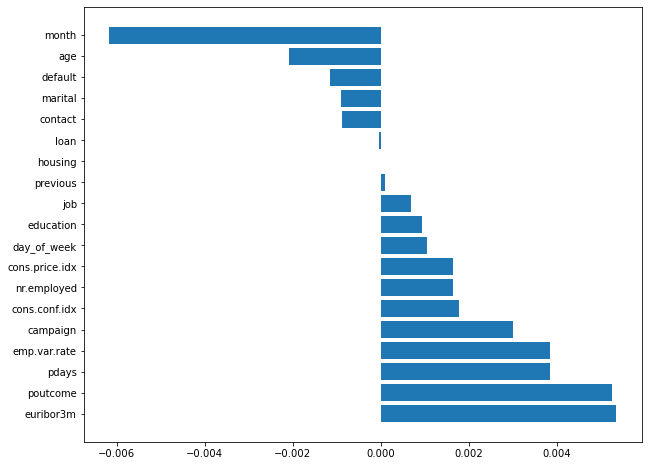

In [89]:
plt.figure(figsize=(10, 8))
plt.barh(df_sorted['feature'],df_sorted['diff_roc_auc_score'])

**Observations:** We can see the following:
* Deleting any of the features - 'euribor3m', 'poutcome', 'pdays', 'emp.var.rate', 'campaign', 'cons.conf.idx', 'nr.employed', 'cons.price.idx', 'day_of_week', 'education', 'job', 'previous', 'housing' - results into improved score than baseline
* Deleting any of the features - 'loan', 'contact', 'marital', 'default', 'age', 'month' - results into reduced score than baseline
* Deleting any of the features - 'housing', 'loan', 'previous' - results into not much difference in score than baseline

Check which features result into least change in score than baseline, irrespective of whether the difference is positive or negative

In [90]:
df_feature_roc_auc.sort_values(by='abs_diff_roc_auc_score',ascending=False)

,feature,new_roc_auc_score,diff_roc_auc_score,abs_diff_roc_auc_score
8,month,0.763343,-0.006174,0.006174
17,euribor3m,0.774865,0.005348,0.005348
13,poutcome,0.774755,0.005238,0.005238
11,pdays,0.773361,0.003844,0.003844
14,emp.var.rate,0.773348,0.003831,0.003831
10,campaign,0.772517,0.003001,0.003001
0,age,0.767437,-0.002080,0.002080
16,cons.conf.idx,0.771288,0.001771,0.001771
18,nr.employed,0.771151,0.001634,0.001634
15,cons.price.idx,0.771142,0.001625,0.001625


Features - 'housing', 'loan', 'previous', 'job', 'contact', 'marital', 'education' - on deleting have minimal effect on score [less than 0.0009]

Will experiment with dropping a groups of features (1. less useful feature, 2. features that on dropping result into increased score) and see the effect on score.

In [92]:
#Experiment 21 onwards

df_train_copy = df_train.copy()
df_val_copy = df_val.copy()

drop_features_list = [
    ['housing', 'loan'],  # 2 least important features
    ['housing', 'loan', 'previous'],  # 3 least important features
    ['housing', 'loan', 'previous', 'job'],  # 4 least important features
    ['housing', 'loan', 'previous', 'job', 'contact'],  # 5 least important features
    ['housing', 'loan', 'previous', 'job', 'contact', 'marital'],  # 6 least important features
    ['housing', 'loan', 'previous', 'job', 'contact', 'marital', 'education'],  # 7 least important features
]

for drop_features in drop_features_list:
    #Defining description based on features being dropped
    entry_desc = f'deleted feature {str(drop_features).replace("[","").replace("]","")}'

    df_train_copy = df_train.copy()
    df_train_copy.drop(drop_features,axis=1,inplace=True)
    df_val_copy = df_val.copy()
    df_val_copy.drop(drop_features,axis=1,inplace=True)
    features_list = list(df_train_copy.columns.values)

    this_auc = evaluate(features_list,df_train_copy,df_val_copy,model)
    print(this_auc, this_auc - baseline_auc)
    score_entry = {"algo": "logisticregression", "desc": entry_desc, "score": this_auc, "diff": this_auc - baseline_auc}
    exp_scores = exp_scores.append(score_entry,ignore_index=True)

0.7694739860045258 -4.258289059422271e-05
0.7695316343221172 1.5065426997251663e-05
0.773247260551948 0.0037306916568280446
0.7683446170306966 -0.0011719518644234261
0.7690882803276269 -0.00042828856749310695
0.7533416039452971 -0.016174964949822845


In [96]:
exp_scores.sort_values(by='score',ascending=False).head(10)

,algo,desc,score,diff
19,logisticregression,delete one feature euribor3m,0.774865,0.005348
15,logisticregression,delete one feature poutcome,0.774755,0.005238
13,logisticregression,delete one feature pdays,0.773361,0.003844
16,logisticregression,delete one feature emp.var.rate,0.773348,0.003831
23,logisticregression,"deleted feature 'housing', 'loan', 'previous',...",0.773247,0.003731
12,logisticregression,delete one feature campaign,0.772517,0.003001
18,logisticregression,delete one feature cons.conf.idx,0.771288,0.001771
20,logisticregression,delete one feature nr.employed,0.771151,0.001634
17,logisticregression,delete one feature cons.price.idx,0.771142,0.001625
11,logisticregression,delete one feature day_of_week,0.770558,0.001041


**Obeservations:** Removing combination of features is not the top scoring experiments, although one of the experiment is ranking 5th amongst the top 10

In [94]:
exp_scores[21:].sort_values(by='score',ascending=False)

,algo,desc,score,diff
23,logisticregression,"deleted feature 'housing', 'loan', 'previous',...",0.773247,0.003731
22,logisticregression,"deleted feature 'housing', 'loan', 'previous'",0.769532,0.000015
21,logisticregression,"deleted feature 'housing', 'loan'",0.769474,-0.000043
25,logisticregression,"deleted feature 'housing', 'loan', 'previous',...",0.769088,-0.000428
24,logisticregression,"deleted feature 'housing', 'loan', 'previous',...",0.768345,-0.001172
26,logisticregression,"deleted feature 'housing', 'loan', 'previous',...",0.753342,-0.016175


**Observations:** Although we removed multiple features that were least significant, on removing multiple features at same time does not seem to improve the score. This could be because we are combining features that have negative effect and features that have positive effect.

Check score after removing multiple least significant features, but those that have a positive effect on score.

In [97]:
#Experiments 27 onwards

train_copy = df_train.copy()
df_val_copy = df_val.copy()

drop_features_list = [
    ['housing', 'previous'],  # 2 least important features that have positive effect on score when dropped
    ['housing', 'previous', 'job'],  # 3 least important features that have positive effect on score when dropped
    ['housing', 'previous', 'job', 'education'],  # 4 least important features that have positive effect on score when dropped
    ['housing', 'previous', 'job', 'education', 'day_of_week']  # 5 least important features that have positive effect on score when dropped
]

for drop_features in drop_features_list:
    #Defining description based on features being dropped
    entry_desc = f'deleted feature {str(drop_features).replace("[","").replace("]","")}'

    df_train_copy = df_train.copy()
    df_train_copy.drop(drop_features,axis=1,inplace=True)
    df_val_copy = df_val.copy()
    df_val_copy.drop(drop_features,axis=1,inplace=True)
    features_list = list(df_train_copy.columns.values)

    this_auc = evaluate(features_list,df_train_copy,df_val_copy,model)
    print(this_auc, this_auc - baseline_auc)
    score_entry = {"algo": "logisticregression", "desc": entry_desc, "score": this_auc, "diff": this_auc - baseline_auc}
    exp_scores = exp_scores.append(score_entry,ignore_index=True)

0.7695988906926408 8.232179752076796e-05
0.7732866920011807 0.00377012310606073
0.7482656311491539 -0.021250937745966092
0.7764159195444708 0.006899350649350766


In [98]:
exp_scores.sort_values(by='score',ascending=False).head(10)

,algo,desc,score,diff
30,logisticregression,"deleted feature 'housing', 'previous', 'job', ...",0.776416,0.006899
19,logisticregression,delete one feature euribor3m,0.774865,0.005348
15,logisticregression,delete one feature poutcome,0.774755,0.005238
13,logisticregression,delete one feature pdays,0.773361,0.003844
16,logisticregression,delete one feature emp.var.rate,0.773348,0.003831
28,logisticregression,"deleted feature 'housing', 'previous', 'job'",0.773287,0.00377
23,logisticregression,"deleted feature 'housing', 'loan', 'previous',...",0.773247,0.003731
12,logisticregression,delete one feature campaign,0.772517,0.003001
18,logisticregression,delete one feature cons.conf.idx,0.771288,0.001771
20,logisticregression,delete one feature nr.employed,0.771151,0.001634


In [99]:
exp_scores[27:].sort_values(by='score',ascending=False)

,algo,desc,score,diff
30,logisticregression,"deleted feature 'housing', 'previous', 'job', ...",0.776416,0.006899
28,logisticregression,"deleted feature 'housing', 'previous', 'job'",0.773287,0.00377
27,logisticregression,"deleted feature 'housing', 'previous'",0.769599,0.000082
29,logisticregression,"deleted feature 'housing', 'previous', 'job', ...",0.748266,-0.021251


**Observations:** We have some improved results from this experiment, as 2 of the experiments are now in the top 10 score rankings, and one being the top rank.

In [100]:
# neg_drop_features = list(df_feature_roc_auc[df_feature_roc_auc['diff_roc_auc_score'] < 0].sort_values(by='diff_roc_auc_score',ascending=False)['feature'].values)
# pos_drop_features = list(df_feature_roc_auc[df_feature_roc_auc['diff_roc_auc_score'] > 0].sort_values(by='diff_roc_auc_score',ascending=False)['feature'].values)

In [54]:
# nums = list(np.linspace(1,len(pos_drop_features),len(pos_drop_features)).astype(int))
# pos_drop_features_dict = dict(zip(pos_drop_features,nums))
# pos_drop_features_dict

In [55]:
# import itertools
# all_combinations = []
# a_list = [1, 2, 3]
# for r in range(len(a_list) + 1):
#     combinations_object = itertools.combinations(a_list, r)
#     combinations_list = list(combinations_object)
#     all_combinations += combinations_list
# print(all_combinations)

##### 5.1.2 Model tuning for LogisticRegression

**Tuning the parameters without using GridsearchCV**

Let us check tuning the algorithm for following parameter values


In [56]:
# max_iters = np.linspace(10, 200,20)
# max_iters

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.,
       120., 130., 140., 150., 160., 170., 180., 190., 200.])

In [57]:
# # define models and parameters
# model = LogisticRegression()

# # define models and parameters
# solvers = ['liblinear']
# penalty = ['l1','l2']
# c_values = [100, 50, 20, 10, 1.0, 0.1, 0.01]
# max_iters = np.linspace(10, 200,20)

# # define grid search
# grid = dict(solver=solvers,penalty=penalty,C=c_values,max_iter=max_iters)
# cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X, y)

# for m in max_iters:
#     model = LogisticRegression(solver='liblinear',random_state=42, max_iter=m)
#     df_train_copy = df_train.copy()
#     df_val_copy = df_val.copy()

#     features_list = df_train_copy.columns

#     this_auc = evaluate(list(features_list),df_train_copy,df_val_copy,model)
#     print(f'roc_auc_score with max_iters={m}: {this_auc}')
#     score_entry = {"algo": "logisticregression", "desc": f"max_iters={m}", "score": this_auc, "diff": this_auc - baseline_auc}
#     exp_scores = exp_scores.append(score_entry,ignore_index=True)

/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=10.0: 0.6555472285763478


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=20.0: 0.7695177987258953
roc_auc_score with max_iters=30.0: 0.7695207195739867
roc_auc_score with max_iters=40.0: 0.7695207195739867
roc_auc_score with max_iters=50.0: 0.7695207195739867
roc_auc_score with max_iters=60.0: 0.7695207195739867
roc_auc_score with max_iters=70.0: 0.7695207195739867
roc_auc_score with max_iters=80.0: 0.7695207195739867
roc_auc_score with max_iters=90.0: 0.7695207195739867
roc_auc_score with max_iters=100.0: 0.7695207195739867
roc_auc_score with max_iters=110.0: 0.7695207195739867
roc_auc_score with max_iters=120.0: 0.7695207195739867
roc_auc_score with max_iters=130.0: 0.7695207195739867
roc_auc_score with max_iters=140.0: 0.7695207195739867
roc_auc_score with max_iters=150.0: 0.7695207195739867
roc_auc_score with max_iters=160.0: 0.7695207195739867
roc_auc_score with max_iters=170.0: 0.7695207195739867
roc_auc_score with max_iters=180.0: 0.7695207195739867
roc_auc_score with max_iters=190.0: 0.7695207195739867
roc_auc_score with

In [58]:
# exp_scores

,algo,desc,score,diff
0,logisticregression,all features including duration,0.928279,NaN
1,logisticregression,baseline score. all features excluding duration,0.769521,0.000000
2,logisticregression,"deleted features 'loan','housing','day_of_week...",0.769512,-0.000008
3,logisticregression,deleted feature age,0.767437,-0.002084
4,logisticregression,deleted feature job,0.770209,0.000689
5,logisticregression,deleted feature marital,0.768598,-0.000923
6,logisticregression,deleted feature education,0.770518,0.000998
7,logisticregression,deleted feature default,0.768368,-0.001153
8,logisticregression,deleted feature housing,0.769505,-0.000016
9,logisticregression,deleted feature loan,0.769479,-0.000042


In [59]:
# max_iter = 30
# c_values = [100, 50, 20, 18, 15, 13, 10, 1.0, 0.1, 0.01, 0.001, 0.0001]
# for c in c_values:
#     model = LogisticRegression(solver='liblinear',random_state=42, max_iter=max_iter, C=c)
#     df_train_copy = df_train.copy()
#     df_val_copy = df_val.copy()

#     features_list = df_train_copy.columns

#     this_auc = evaluate(list(features_list),df_train_copy,df_val_copy,model)
#     print(f'roc_auc_score with max_iters={max_iter}, C={c}: {this_auc}')
#     score_entry = {"algo": "logisticregression", "desc": f"max_iters={max_iter}, C={c}", "score": this_auc, "diff": this_auc - baseline_auc}
#     exp_scores = exp_scores.append(score_entry,ignore_index=True)

roc_auc_score with max_iters=30, C=100: 0.769530250762495
roc_auc_score with max_iters=30, C=50: 0.7695184136412829
roc_auc_score with max_iters=30, C=20: 0.7735939191017316
roc_auc_score with max_iters=30, C=18: 0.7695210270316805
roc_auc_score with max_iters=30, C=15: 0.7695228717778434
roc_auc_score with max_iters=30, C=13: 0.7695184136412829
roc_auc_score with max_iters=30, C=10: 0.769514724148957
roc_auc_score with max_iters=30, C=1.0: 0.7695207195739867
roc_auc_score with max_iters=30, C=0.1: 0.769490742448839
roc_auc_score with max_iters=30, C=0.01: 0.7739823918978749
roc_auc_score with max_iters=30, C=0.001: 0.7639091554752065
roc_auc_score with max_iters=30, C=0.0001: 0.7429566822855175


In [60]:
exp_scores.sort_values(by='score',ascending=False).head(10)

,algo,desc,score,diff
0,logisticregression,all features including duration,0.928279,NaN
22,logisticregression,"deleted features 'housing','loan','previous','...",0.776174,0.006654
16,logisticregression,deleted feature poutcome,0.774753,0.005233
19,logisticregression,deleted feature cons.conf.idx,0.774605,0.005084
20,logisticregression,deleted feature euribor3m,0.774098,0.004578
59,logisticregression,"max_iters=30, C=0.01",0.773982,0.004462
52,logisticregression,"max_iters=30, C=20",0.773594,0.004073
14,logisticregression,deleted feature pdays,0.773361,0.003840
17,logisticregression,deleted feature emp.var.rate,0.773348,0.003827
24,logisticregression,"deleted features 'housing','loan','previous','...",0.773269,0.003748


In [73]:
# exp_scores.sort_values(by='score',ascending=False).iloc[1]['desc']

"deleted features 'housing','loan','previous','marital','education','day_of_week'"

max_iters=30, C=0.01 gives slightly better results amongst all the parameters so far. Let us check with deleted features 'housing','loan','previous','marital','education','day_of_week' - which is the experiment with highest score so far

In [82]:
# max_iter = 30
# c = 0.01
# drop_features = ['housing','loan','previous','marital','education','day_of_week']

# model = LogisticRegression(solver='liblinear',random_state=42, max_iter=max_iter, C=c)

# df_train_copy = df_train.copy()
# df_train_copy.drop(drop_features,axis=1,inplace=True)
# df_val_copy = df_val.copy()
# df_val_copy.drop(drop_features,axis=1,inplace=True)

# features_list = df_train_copy.columns

# this_auc = evaluate(list(features_list),df_train_copy,df_val_copy,model)
# print(f"roc_auc_score with max_iters={max_iter}, C={c} and deleted features 'housing','loan','previous','marital','education','day_of_week': {this_auc}")
# score_entry = {"algo": "logisticregression", "desc": f"max_iters={max_iter}, C={c} and deleted features 'housing','loan','previous','marital','education','day_of_week'", "score": this_auc, "diff": this_auc - baseline_auc}
# exp_scores = exp_scores.append(score_entry,ignore_index=True)

roc_auc_score with max_iters=30, C=0.01 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7754611865407319


In [83]:
# exp_scores.sort_values(by='score',ascending=False).head(10)

,algo,desc,score,diff
0,logisticregression,all features including duration,0.928279,NaN
22,logisticregression,"deleted features 'housing','loan','previous','...",0.776174,0.006654
62,logisticregression,"max_iters=30, C=0.01 and deleted features 'hou...",0.775461,0.005940
16,logisticregression,deleted feature poutcome,0.774753,0.005233
19,logisticregression,deleted feature cons.conf.idx,0.774605,0.005084
20,logisticregression,deleted feature euribor3m,0.774098,0.004578
59,logisticregression,"max_iters=30, C=0.01",0.773982,0.004462
52,logisticregression,"max_iters=30, C=20",0.773594,0.004073
14,logisticregression,deleted feature pdays,0.773361,0.003840
17,logisticregression,deleted feature emp.var.rate,0.773348,0.003827


In [84]:
# c_values = [100, 10, 1.0, 0.1, 0.01]
# max_iters = np.linspace(10, 200,20)
# penalties = ['l1', 'l2']
# drop_features = ['housing','loan','previous','marital','education','day_of_week']

# df_train_copy = df_train.copy()
# df_train_copy.drop(drop_features,axis=1,inplace=True)
# df_val_copy = df_val.copy()
# df_val_copy.drop(drop_features,axis=1,inplace=True)

# features_list = df_train_copy.columns

# for max_iter in max_iters:
#     for c in c_values:
#         for penalty in penalties:
#             model = LogisticRegression(penalty=penalty,solver='liblinear',random_state=42, max_iter=max_iter, C=c)
#             this_auc = evaluate(list(features_list),df_train_copy,df_val_copy,model)
#             print(f"roc_auc_score with max_iters={max_iter}, C={c}, penalty={penalty} and deleted features 'housing','loan','previous','marital','education','day_of_week': {this_auc}")
#             score_entry = {"algo": "logisticregression", "desc": f"max_iters={max_iter}, C={c} and deleted features 'housing','loan','previous','marital','education','day_of_week'", "score": this_auc, "diff": this_auc - baseline_auc}
#             exp_scores = exp_scores.append(score_entry,ignore_index=True)

/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=10.0, C=100, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7751621839334907


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=10.0, C=100, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.6550974179702873


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=10.0, C=50, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7751621839334908


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=10.0, C=50, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.6550974179702873


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=10.0, C=20, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7751531139315231


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=10.0, C=20, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.6550973411058638


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=10.0, C=18, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7751520378295946


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=10.0, C=18, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.6550977254279811


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=10.0, C=15, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7751512691853601


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=10.0, C=15, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.6550976485635577


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=10.0, C=13, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7751500393545847


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=10.0, C=13, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.6550975716991342


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=10.0, C=10, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7751337440968123


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=10.0, C=10, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.6550976485635578


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=10.0, C=1.0, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7749065328610782


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=10.0, C=1.0, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.6550976485635577


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=10.0, C=0.1, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7734612511068477


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=10.0, C=0.1, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.6550981097500985


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=10.0, C=0.01, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7652099321133412


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=10.0, C=0.01, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.6550998007674145


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=10.0, C=0.001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7385766399793388


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=10.0, C=0.001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.655119478059819


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=10.0, C=0.0001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.44696408586678477


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=10.0, C=0.0001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.6552983415731995


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=20.0, C=100, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7736826975108225


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=20.0, C=100, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.77047845029024


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=20.0, C=50, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7737115985340417


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=20.0, C=50, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7704899799537583


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=20.0, C=20, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7737769332939788


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=20.0, C=20, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7704908254624163


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=20.0, C=18, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7737029897186147


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=20.0, C=18, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7704857524104682


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=20.0, C=15, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7737042964138134


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=20.0, C=15, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.770489749360488


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=20.0, C=13, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7736672477617079


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=20.0, C=13, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7704874434277843


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=20.0, C=10, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7736514136904762


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=20.0, C=10, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7515371347402597


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=20.0, C=1.0, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7733606355765447


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=20.0, C=1.0, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7704553140987801


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=20.0, C=0.1, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7725773871015349


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=20.0, C=0.1, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.770431178669815


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=20.0, C=0.01, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7657358384986227


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=20.0, C=0.01, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7636832509346714


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=20.0, C=0.001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7370956162682014


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=20.0, C=0.001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7611573322510823
roc_auc_score with max_iters=20.0, C=0.0001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.44696669925718224
roc_auc_score with max_iters=20.0, C=0.0001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.743846234258166


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=30.0, C=100, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7736999151416766
roc_auc_score with max_iters=30.0, C=100, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761827897481306


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=30.0, C=50, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7734796217040536
roc_auc_score with max_iters=30.0, C=50, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761755644923258


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=30.0, C=20, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7733332718417947
roc_auc_score with max_iters=30.0, C=20, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761758719500197


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=30.0, C=18, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7736605605568674
roc_auc_score with max_iters=30.0, C=18, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761732585596222


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=30.0, C=15, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7736431891971665
roc_auc_score with max_iters=30.0, C=15, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761763331365604


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=30.0, C=13, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7736547188606848
roc_auc_score with max_iters=30.0, C=13, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761769480519481


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=30.0, C=10, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.77397093909878
roc_auc_score with max_iters=30.0, C=10, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7760772548947265


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=30.0, C=1.0, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7746587988242817
roc_auc_score with max_iters=30.0, C=1.0, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761744883903975


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=30.0, C=0.1, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.773517669593664
roc_auc_score with max_iters=30.0, C=0.1, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761898612750885


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=30.0, C=0.01, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7659088603158205
roc_auc_score with max_iters=30.0, C=0.01, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7754611865407319
roc_auc_score with max_iters=30.0, C=0.001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.737010450487013
roc_auc_score with max_iters=30.0, C=0.001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7611606374212909
roc_auc_score with max_iters=30.0, C=0.0001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.44696669925718224
roc_auc_score with max_iters=30.0, C=0.0001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.743846234258166


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=40.0, C=100, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7740972273465171
roc_auc_score with max_iters=40.0, C=100, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761827897481306


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=40.0, C=50, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7739425761265251
roc_auc_score with max_iters=40.0, C=50, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761755644923258


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=40.0, C=20, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7738047582152695
roc_auc_score with max_iters=40.0, C=20, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761758719500197


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=40.0, C=18, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7739634063852814
roc_auc_score with max_iters=40.0, C=18, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761732585596222


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=40.0, C=15, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7739226682408501
roc_auc_score with max_iters=40.0, C=15, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761763331365604


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=40.0, C=13, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7742433466155056
roc_auc_score with max_iters=40.0, C=13, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761769480519481


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=40.0, C=10, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7745329717630854
roc_auc_score with max_iters=40.0, C=10, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7760772548947265


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=40.0, C=1.0, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7758891676505313
roc_auc_score with max_iters=40.0, C=1.0, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761744883903975


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=40.0, C=0.1, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7742786273858717
roc_auc_score with max_iters=40.0, C=0.1, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761898612750885


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=40.0, C=0.01, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7657364534140102
roc_auc_score with max_iters=40.0, C=0.01, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7754611865407319
roc_auc_score with max_iters=40.0, C=0.001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.737010450487013
roc_auc_score with max_iters=40.0, C=0.001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7611606374212909
roc_auc_score with max_iters=40.0, C=0.0001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.44696669925718224
roc_auc_score with max_iters=40.0, C=0.0001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.743846234258166


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=50.0, C=100, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7745861619441164
roc_auc_score with max_iters=50.0, C=100, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761827897481306


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=50.0, C=50, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7744966917552145
roc_auc_score with max_iters=50.0, C=50, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761755644923258


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=50.0, C=20, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7745088363341204
roc_auc_score with max_iters=50.0, C=20, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761758719500197


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=50.0, C=18, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7747129882428178
roc_auc_score with max_iters=50.0, C=18, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761732585596222


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=50.0, C=15, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7750375098386463
roc_auc_score with max_iters=50.0, C=15, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761763331365604


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=50.0, C=13, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7751855507182212
roc_auc_score with max_iters=50.0, C=13, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761769480519481


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=50.0, C=10, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7754341302636757
roc_auc_score with max_iters=50.0, C=10, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7760772548947265


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=50.0, C=1.0, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7769010877853209
roc_auc_score with max_iters=50.0, C=1.0, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761744883903975


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=50.0, C=0.1, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7757459692296341
roc_auc_score with max_iters=50.0, C=0.1, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761898612750885


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=50.0, C=0.01, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7656541316164895
roc_auc_score with max_iters=50.0, C=0.01, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7754611865407319
roc_auc_score with max_iters=50.0, C=0.001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.737010450487013
roc_auc_score with max_iters=50.0, C=0.001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7611606374212909
roc_auc_score with max_iters=50.0, C=0.0001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.44696669925718224
roc_auc_score with max_iters=50.0, C=0.0001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.743846234258166


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=60.0, C=100, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7751395089285715
roc_auc_score with max_iters=60.0, C=100, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761827897481306


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=60.0, C=50, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7751267494342777
roc_auc_score with max_iters=60.0, C=50, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761755644923258


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=60.0, C=20, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.775481632477371
roc_auc_score with max_iters=60.0, C=20, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761758719500197


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=60.0, C=18, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7752366655598188
roc_auc_score with max_iters=60.0, C=18, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761732585596222


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=60.0, C=15, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7757721031336089
roc_auc_score with max_iters=60.0, C=15, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761763331365604


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=60.0, C=13, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.775845201200315
roc_auc_score with max_iters=60.0, C=13, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761769480519481


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=60.0, C=10, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761641885576545
roc_auc_score with max_iters=60.0, C=10, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7760772548947265


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=60.0, C=1.0, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7777638909386068
roc_auc_score with max_iters=60.0, C=1.0, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761744883903975


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=60.0, C=0.1, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7766721086678474
roc_auc_score with max_iters=60.0, C=0.1, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761898612750885


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=60.0, C=0.01, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7655218479437229
roc_auc_score with max_iters=60.0, C=0.01, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7754611865407319
roc_auc_score with max_iters=60.0, C=0.001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.737010450487013
roc_auc_score with max_iters=60.0, C=0.001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7611606374212909
roc_auc_score with max_iters=60.0, C=0.0001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.44696669925718224
roc_auc_score with max_iters=60.0, C=0.0001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.743846234258166


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=70.0, C=100, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7757998511904762
roc_auc_score with max_iters=70.0, C=100, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761827897481306


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=70.0, C=50, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7757607271989374
roc_auc_score with max_iters=70.0, C=50, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761755644923258


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=70.0, C=20, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7760836346418734
roc_auc_score with max_iters=70.0, C=20, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761758719500197


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=70.0, C=18, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7762598079004328
roc_auc_score with max_iters=70.0, C=18, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761732585596222


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=70.0, C=15, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7764044667453758
roc_auc_score with max_iters=70.0, C=15, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761763331365604


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=70.0, C=13, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7763700314836679
roc_auc_score with max_iters=70.0, C=13, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761769480519481


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=70.0, C=10, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.77683967311098
roc_auc_score with max_iters=70.0, C=10, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7760772548947265


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=70.0, C=1.0, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.778424463793782
roc_auc_score with max_iters=70.0, C=1.0, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761744883903975


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=70.0, C=0.1, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7773864097550177
roc_auc_score with max_iters=70.0, C=0.1, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761898612750885


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=70.0, C=0.01, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7654221547865013
roc_auc_score with max_iters=70.0, C=0.01, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7754611865407319
roc_auc_score with max_iters=70.0, C=0.001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.737010450487013
roc_auc_score with max_iters=70.0, C=0.001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7611606374212909
roc_auc_score with max_iters=70.0, C=0.0001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.44696669925718224
roc_auc_score with max_iters=70.0, C=0.0001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.743846234258166


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=80.0, C=100, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7762619601042896
roc_auc_score with max_iters=80.0, C=100, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761827897481306


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=80.0, C=50, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7762419753541914
roc_auc_score with max_iters=80.0, C=50, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761755644923258


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=80.0, C=20, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7766928620621802
roc_auc_score with max_iters=80.0, C=20, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761758719500197


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=80.0, C=18, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7769766455135774
roc_auc_score with max_iters=80.0, C=18, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761732585596222


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=80.0, C=15, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.777126146817198
roc_auc_score with max_iters=80.0, C=15, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761763331365604


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=80.0, C=13, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7768080049685163
roc_auc_score with max_iters=80.0, C=13, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761769480519481


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=80.0, C=10, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7774073937426209
roc_auc_score with max_iters=80.0, C=10, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7760772548947265


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=80.0, C=1.0, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7786749649498228
roc_auc_score with max_iters=80.0, C=1.0, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761744883903975


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=80.0, C=0.1, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7778144677292403
roc_auc_score with max_iters=80.0, C=0.1, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761898612750885


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=80.0, C=0.01, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7655867983815428
roc_auc_score with max_iters=80.0, C=0.01, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7754611865407319
roc_auc_score with max_iters=80.0, C=0.001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.737010450487013
roc_auc_score with max_iters=80.0, C=0.001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7611606374212909
roc_auc_score with max_iters=80.0, C=0.0001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.44696669925718224
roc_auc_score with max_iters=80.0, C=0.0001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.743846234258166


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=90.0, C=100, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7768405954840614
roc_auc_score with max_iters=90.0, C=100, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761827897481306


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=90.0, C=50, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7767166900334515
roc_auc_score with max_iters=90.0, C=50, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761755644923258


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=90.0, C=20, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7771512814836679
roc_auc_score with max_iters=90.0, C=20, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761758719500197


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=90.0, C=18, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7773135422815821
roc_auc_score with max_iters=90.0, C=18, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761732585596222


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=90.0, C=15, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7776284558244785
roc_auc_score with max_iters=90.0, C=15, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761763331365604


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=90.0, C=13, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7773075468565525
roc_auc_score with max_iters=90.0, C=13, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761769480519481


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=90.0, C=10, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7780070899744195
roc_auc_score with max_iters=90.0, C=10, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7760772548947265


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=90.0, C=1.0, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7790186257870918
roc_auc_score with max_iters=90.0, C=1.0, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761744883903975


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=90.0, C=0.1, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7778000940820542
roc_auc_score with max_iters=90.0, C=0.1, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761898612750885


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=90.0, C=0.01, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7656715029761904
roc_auc_score with max_iters=90.0, C=0.01, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7754611865407319
roc_auc_score with max_iters=90.0, C=0.001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.737010450487013
roc_auc_score with max_iters=90.0, C=0.001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7611606374212909
roc_auc_score with max_iters=90.0, C=0.0001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.44696669925718224
roc_auc_score with max_iters=90.0, C=0.0001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.743846234258166


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=100.0, C=100, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7773998610291224
roc_auc_score with max_iters=100.0, C=100, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761827897481306


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=100.0, C=50, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7773717286501378
roc_auc_score with max_iters=100.0, C=50, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761755644923258


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=100.0, C=20, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7777526687327823
roc_auc_score with max_iters=100.0, C=20, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761758719500197


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=100.0, C=18, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7778289182408501
roc_auc_score with max_iters=100.0, C=18, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761732585596222


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=100.0, C=15, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7779233077528532
roc_auc_score with max_iters=100.0, C=15, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761763331365604


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=100.0, C=13, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7778106245080677
roc_auc_score with max_iters=100.0, C=13, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761769480519481


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=100.0, C=10, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7783800361570248
roc_auc_score with max_iters=100.0, C=10, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7760772548947265


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=100.0, C=1.0, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7791619010724125
roc_auc_score with max_iters=100.0, C=1.0, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761744883903975


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=100.0, C=0.1, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.777812546118654
roc_auc_score with max_iters=100.0, C=0.1, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761898612750885


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=100.0, C=0.01, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7657346855322706
roc_auc_score with max_iters=100.0, C=0.01, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7754611865407319
roc_auc_score with max_iters=100.0, C=0.001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.737010450487013
roc_auc_score with max_iters=100.0, C=0.001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7611606374212909
roc_auc_score with max_iters=100.0, C=0.0001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.44696669925718224
roc_auc_score with max_iters=100.0, C=0.0001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.743846234258166


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=110.0, C=100, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7776666574429358
roc_auc_score with max_iters=110.0, C=100, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761827897481306


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=110.0, C=50, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7776239976879181
roc_auc_score with max_iters=110.0, C=50, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761755644923258


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=110.0, C=20, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7778835688459269
roc_auc_score with max_iters=110.0, C=20, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761758719500197


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=110.0, C=18, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7781328401711924
roc_auc_score with max_iters=110.0, C=18, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761732585596222


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=110.0, C=15, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7783638177636757
roc_auc_score with max_iters=110.0, C=15, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761763331365604


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=110.0, C=13, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7781339931375442
roc_auc_score with max_iters=110.0, C=13, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761769480519481


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=110.0, C=10, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7786597457939787
roc_auc_score with max_iters=110.0, C=10, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7760772548947265
roc_auc_score with max_iters=110.0, C=1.0, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7792243149842583
roc_auc_score with max_iters=110.0, C=1.0, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761744883903975


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=110.0, C=0.1, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7778426769726486
roc_auc_score with max_iters=110.0, C=0.1, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761898612750885


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=110.0, C=0.01, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7658708892906336
roc_auc_score with max_iters=110.0, C=0.01, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7754611865407319
roc_auc_score with max_iters=110.0, C=0.001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.737010450487013
roc_auc_score with max_iters=110.0, C=0.001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7611606374212909
roc_auc_score with max_iters=110.0, C=0.0001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.44696669925718224
roc_auc_score with max_iters=110.0, C=0.0001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.743846234258166


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=120.0, C=100, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7780309179456908
roc_auc_score with max_iters=120.0, C=100, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761827897481306


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=120.0, C=50, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7780043228551751
roc_auc_score with max_iters=120.0, C=50, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761755644923258


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=120.0, C=20, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7782382981601732
roc_auc_score with max_iters=120.0, C=20, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761758719500197


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=120.0, C=18, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7783990216696184
roc_auc_score with max_iters=120.0, C=18, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761732585596222


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=120.0, C=15, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7786299992621015
roc_auc_score with max_iters=120.0, C=15, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761763331365604


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=120.0, C=13, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7783917195493899
roc_auc_score with max_iters=120.0, C=13, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761769480519481


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=120.0, C=10, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7788948740653285
roc_auc_score with max_iters=120.0, C=10, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7760772548947265
roc_auc_score with max_iters=120.0, C=1.0, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7792243149842583
roc_auc_score with max_iters=120.0, C=1.0, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761744883903975


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=120.0, C=0.1, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7779000178325463
roc_auc_score with max_iters=120.0, C=0.1, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761898612750885


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=120.0, C=0.01, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7659092446379379
roc_auc_score with max_iters=120.0, C=0.01, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7754611865407319
roc_auc_score with max_iters=120.0, C=0.001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.737010450487013
roc_auc_score with max_iters=120.0, C=0.001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7611606374212909
roc_auc_score with max_iters=120.0, C=0.0001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.44696669925718224
roc_auc_score with max_iters=120.0, C=0.0001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.743846234258166


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=130.0, C=100, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7783898748032271
roc_auc_score with max_iters=130.0, C=100, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761827897481306


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=130.0, C=50, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7783505202184179
roc_auc_score with max_iters=130.0, C=50, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761755644923258


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=130.0, C=20, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7783931031090122
roc_auc_score with max_iters=130.0, C=20, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761758719500197


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=130.0, C=18, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7785422200905154
roc_auc_score with max_iters=130.0, C=18, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761732585596222


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=130.0, C=15, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.779006865530303
roc_auc_score with max_iters=130.0, C=15, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761763331365604


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=130.0, C=13, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7785984848484848
roc_auc_score with max_iters=130.0, C=13, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761769480519481


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=130.0, C=10, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7790873425816608
roc_auc_score with max_iters=130.0, C=10, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7760772548947265
roc_auc_score with max_iters=130.0, C=1.0, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7792243149842583
roc_auc_score with max_iters=130.0, C=1.0, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761744883903975
roc_auc_score with max_iters=130.0, C=0.1, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7779132385133805
roc_auc_score with max_iters=130.0, C=0.1, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761898612750885


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=130.0, C=0.01, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7659494447314049
roc_auc_score with max_iters=130.0, C=0.01, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7754611865407319
roc_auc_score with max_iters=130.0, C=0.001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.737010450487013
roc_auc_score with max_iters=130.0, C=0.001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7611606374212909
roc_auc_score with max_iters=130.0, C=0.0001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.44696669925718224
roc_auc_score with max_iters=130.0, C=0.0001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.743846234258166


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=140.0, C=100, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7786504451987406
roc_auc_score with max_iters=140.0, C=100, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761827897481306


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=140.0, C=50, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7785795762003149
roc_auc_score with max_iters=140.0, C=50, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761755644923258


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=140.0, C=20, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7786203143447461
roc_auc_score with max_iters=140.0, C=20, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761758719500197


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=140.0, C=18, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.778782498278237
roc_auc_score with max_iters=140.0, C=18, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761732585596222


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=140.0, C=15, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.779099025974026
roc_auc_score with max_iters=140.0, C=15, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761763331365604


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=140.0, C=13, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7788832675373868
roc_auc_score with max_iters=140.0, C=13, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761769480519481


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=140.0, C=10, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7792213941361669
roc_auc_score with max_iters=140.0, C=10, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7760772548947265
roc_auc_score with max_iters=140.0, C=1.0, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7792243149842583
roc_auc_score with max_iters=140.0, C=1.0, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761744883903975
roc_auc_score with max_iters=140.0, C=0.1, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7779132385133805
roc_auc_score with max_iters=140.0, C=0.1, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761898612750885


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=140.0, C=0.01, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7659554401564344
roc_auc_score with max_iters=140.0, C=0.01, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7754611865407319
roc_auc_score with max_iters=140.0, C=0.001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.737010450487013
roc_auc_score with max_iters=140.0, C=0.001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7611606374212909
roc_auc_score with max_iters=140.0, C=0.0001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.44696669925718224
roc_auc_score with max_iters=140.0, C=0.0001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.743846234258166


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=150.0, C=100, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7788956427095632
roc_auc_score with max_iters=150.0, C=100, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761827897481306


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=150.0, C=50, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7788541359208974
roc_auc_score with max_iters=150.0, C=50, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761755644923258


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=150.0, C=20, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7788708923652107
roc_auc_score with max_iters=150.0, C=20, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761758719500197


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=150.0, C=18, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7790021768004722
roc_auc_score with max_iters=150.0, C=18, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761732585596222


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=150.0, C=15, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7791477580184967
roc_auc_score with max_iters=150.0, C=15, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761763331365604


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=150.0, C=13, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7790305397727273
roc_auc_score with max_iters=150.0, C=13, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761769480519481


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=150.0, C=10, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.779296721271153
roc_auc_score with max_iters=150.0, C=10, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7760772548947265
roc_auc_score with max_iters=150.0, C=1.0, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7792243149842583
roc_auc_score with max_iters=150.0, C=1.0, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761744883903975
roc_auc_score with max_iters=150.0, C=0.1, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7779132385133805
roc_auc_score with max_iters=150.0, C=0.1, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761898612750885


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=150.0, C=0.01, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7659437567640692
roc_auc_score with max_iters=150.0, C=0.01, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7754611865407319
roc_auc_score with max_iters=150.0, C=0.001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.737010450487013
roc_auc_score with max_iters=150.0, C=0.001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7611606374212909
roc_auc_score with max_iters=150.0, C=0.0001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.44696669925718224
roc_auc_score with max_iters=150.0, C=0.0001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.743846234258166


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=160.0, C=100, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7790495252853208
roc_auc_score with max_iters=160.0, C=100, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761827897481306


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=160.0, C=50, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7789705086580087
roc_auc_score with max_iters=160.0, C=50, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761755644923258


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=160.0, C=20, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7790569042699724
roc_auc_score with max_iters=160.0, C=20, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761758719500197


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=160.0, C=18, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7790984879230618
roc_auc_score with max_iters=160.0, C=18, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761732585596222


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=160.0, C=15, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7792104793880361
roc_auc_score with max_iters=160.0, C=15, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761763331365604


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=160.0, C=13, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7791097869933097
roc_auc_score with max_iters=160.0, C=13, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761769480519481


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=160.0, C=10, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7793541389954742
roc_auc_score with max_iters=160.0, C=10, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7760772548947265
roc_auc_score with max_iters=160.0, C=1.0, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7792243149842583
roc_auc_score with max_iters=160.0, C=1.0, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761744883903975
roc_auc_score with max_iters=160.0, C=0.1, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7779132385133805
roc_auc_score with max_iters=160.0, C=0.1, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761898612750885


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=160.0, C=0.01, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7658826495474224
roc_auc_score with max_iters=160.0, C=0.01, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7754611865407319
roc_auc_score with max_iters=160.0, C=0.001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.737010450487013
roc_auc_score with max_iters=160.0, C=0.001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7611606374212909
roc_auc_score with max_iters=160.0, C=0.0001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.44696669925718224
roc_auc_score with max_iters=160.0, C=0.0001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.743846234258166


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=170.0, C=100, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7791120929260134
roc_auc_score with max_iters=170.0, C=100, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761827897481306


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=170.0, C=50, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7790733532565919
roc_auc_score with max_iters=170.0, C=50, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761755644923258


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=170.0, C=20, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7791622085301062
roc_auc_score with max_iters=170.0, C=20, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761758719500197


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=170.0, C=18, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7791763515840221
roc_auc_score with max_iters=170.0, C=18, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761732585596222
roc_auc_score with max_iters=170.0, C=15, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7792533697363243
roc_auc_score with max_iters=170.0, C=15, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761763331365604


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=170.0, C=13, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.779186651416765
roc_auc_score with max_iters=170.0, C=13, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761769480519481


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=170.0, C=10, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7793145538173947
roc_auc_score with max_iters=170.0, C=10, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7760772548947265
roc_auc_score with max_iters=170.0, C=1.0, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7792243149842583
roc_auc_score with max_iters=170.0, C=1.0, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761744883903975
roc_auc_score with max_iters=170.0, C=0.1, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7779132385133805
roc_auc_score with max_iters=170.0, C=0.1, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761898612750885


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=170.0, C=0.01, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7658406815722156
roc_auc_score with max_iters=170.0, C=0.01, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7754611865407319
roc_auc_score with max_iters=170.0, C=0.001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.737010450487013
roc_auc_score with max_iters=170.0, C=0.001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7611606374212909
roc_auc_score with max_iters=170.0, C=0.0001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.44696669925718224
roc_auc_score with max_iters=170.0, C=0.0001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.743846234258166


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=180.0, C=100, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7791325388626524
roc_auc_score with max_iters=180.0, C=100, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761827897481306


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=180.0, C=50, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7791263897087761
roc_auc_score with max_iters=180.0, C=50, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761755644923258


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=180.0, C=20, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7791999489620228
roc_auc_score with max_iters=180.0, C=20, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761758719500197


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=180.0, C=18, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7792539846517119
roc_auc_score with max_iters=180.0, C=18, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761732585596222
roc_auc_score with max_iters=180.0, C=15, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7792533697363243
roc_auc_score with max_iters=180.0, C=15, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761763331365604


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=180.0, C=13, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7792343073593073
roc_auc_score with max_iters=180.0, C=13, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761769480519481


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=180.0, C=10, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7792296954939
roc_auc_score with max_iters=180.0, C=10, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7760772548947265
roc_auc_score with max_iters=180.0, C=1.0, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7792243149842583
roc_auc_score with max_iters=180.0, C=1.0, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761744883903975
roc_auc_score with max_iters=180.0, C=0.1, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7779132385133805
roc_auc_score with max_iters=180.0, C=0.1, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761898612750885


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=180.0, C=0.01, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7657359922274696
roc_auc_score with max_iters=180.0, C=0.01, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7754611865407319
roc_auc_score with max_iters=180.0, C=0.001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.737010450487013
roc_auc_score with max_iters=180.0, C=0.001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7611606374212909
roc_auc_score with max_iters=180.0, C=0.0001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.44696669925718224
roc_auc_score with max_iters=180.0, C=0.0001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.743846234258166


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=190.0, C=100, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7791612861570247
roc_auc_score with max_iters=190.0, C=100, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761827897481306


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=190.0, C=50, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7791468356454152
roc_auc_score with max_iters=190.0, C=50, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761755644923258


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=190.0, C=20, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.779267666519087
roc_auc_score with max_iters=190.0, C=20, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761758719500197


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=190.0, C=18, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7792947996605668
roc_auc_score with max_iters=190.0, C=18, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761732585596222
roc_auc_score with max_iters=190.0, C=15, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7792533697363243
roc_auc_score with max_iters=190.0, C=15, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761763331365604


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=190.0, C=13, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7792763521989374
roc_auc_score with max_iters=190.0, C=13, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761769480519481


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=190.0, C=10, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.779173123278237
roc_auc_score with max_iters=190.0, C=10, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7760772548947265
roc_auc_score with max_iters=190.0, C=1.0, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7792243149842583
roc_auc_score with max_iters=190.0, C=1.0, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761744883903975
roc_auc_score with max_iters=190.0, C=0.1, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7779132385133805
roc_auc_score with max_iters=190.0, C=0.1, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761898612750885


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=190.0, C=0.01, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7657053233225108
roc_auc_score with max_iters=190.0, C=0.01, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7754611865407319
roc_auc_score with max_iters=190.0, C=0.001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.737010450487013
roc_auc_score with max_iters=190.0, C=0.001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7611606374212909
roc_auc_score with max_iters=190.0, C=0.0001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.44696669925718224
roc_auc_score with max_iters=190.0, C=0.0001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.743846234258166


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=200.0, C=100, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.779233077528532
roc_auc_score with max_iters=200.0, C=100, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761827897481306


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=200.0, C=50, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7792071742178276
roc_auc_score with max_iters=200.0, C=50, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761755644923258


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=200.0, C=20, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7793175515299094
roc_auc_score with max_iters=200.0, C=20, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761758719500197


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=200.0, C=18, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7793007182211729
roc_auc_score with max_iters=200.0, C=18, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761732585596222
roc_auc_score with max_iters=200.0, C=15, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7792533697363243
roc_auc_score with max_iters=200.0, C=15, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761763331365604


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=200.0, C=13, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7793187044962613
roc_auc_score with max_iters=200.0, C=13, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761769480519481
roc_auc_score with max_iters=200.0, C=10, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.77915406090122
roc_auc_score with max_iters=200.0, C=10, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7760772548947265
roc_auc_score with max_iters=200.0, C=1.0, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7792243149842583
roc_auc_score with max_iters=200.0, C=1.0, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7761744883903975
roc_auc_score with max_iters=200.0, C=0.1, penalty=l

/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score with max_iters=200.0, C=0.01, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7656362990702479
roc_auc_score with max_iters=200.0, C=0.01, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7754611865407319
roc_auc_score with max_iters=200.0, C=0.001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.737010450487013
roc_auc_score with max_iters=200.0, C=0.001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.7611606374212909
roc_auc_score with max_iters=200.0, C=0.0001, penalty=l1 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.44696669925718224
roc_auc_score with max_iters=200.0, C=0.0001, penalty=l2 and deleted features 'housing','loan','previous','marital','education','day_of_week': 0.743846234258166


In [85]:
# exp_scores.sort_values(by='score',ascending=False).head(10)

,algo,desc,score,diff
0,logisticregression,all features including duration,0.928279,NaN
435,logisticregression,"max_iters=160.0, C=10 and deleted features 'ho...",0.779354,0.009833
529,logisticregression,"max_iters=200.0, C=13 and deleted features 'ho...",0.779319,0.009798
523,logisticregression,"max_iters=200.0, C=20 and deleted features 'ho...",0.779318,0.009797
459,logisticregression,"max_iters=170.0, C=10 and deleted features 'ho...",0.779315,0.009794
525,logisticregression,"max_iters=200.0, C=18 and deleted features 'ho...",0.779301,0.009780
411,logisticregression,"max_iters=150.0, C=10 and deleted features 'ho...",0.779297,0.009776
501,logisticregression,"max_iters=190.0, C=18 and deleted features 'ho...",0.779295,0.009774
505,logisticregression,"max_iters=190.0, C=13 and deleted features 'ho...",0.779276,0.009756
499,logisticregression,"max_iters=190.0, C=20 and deleted features 'ho...",0.779268,0.009747


In [89]:
# exp_scores.sort_values(by='score',ascending=False).iloc[1].desc

"max_iters=160.0, C=10 and deleted features 'housing','loan','previous','marital','education','day_of_week'"

**Best performance for Logistic Regression**
* Features: deleted features 'housing','loan','previous','marital','education','day_of_week' 
* Hyperparameters: max_iters=160.0, C=10

**Tuning the parameters using GridsearchCV**

In [97]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

df_train_copy = df_train.copy()
df_val_copy = df_val.copy()

dict_train_new = df_train_copy.to_dict(orient='records')
X_train_new = dv.fit_transform(dict_train_new)


# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(X_train_new, y_train)

/home/ubuntu/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


In [98]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.792978 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.789964 (0.007532) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.792607 (0.007932) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.776233 (0.007312) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.789592 (0.009309) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'lbfgs'}
0.790988 (0.007548) with: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.792648 (0.007830) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.776336 (0.007234) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.786522 (0.012782) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: 

In [93]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [101]:
# summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
columns = ['algo','mean_test_score','std_test_score','params']
df_gridcv_results = pd.DataFrame(columns=columns)
for mean, stdev, param in zip(means, stds, params):
    score_entry = {"algo": "logisticregression", "mean_test_score": mean, "std_test_score": stdev, "params": param}
    df_gridcv_results = df_gridcv_results.append(score_entry,ignore_index=True)

In [103]:
df_gridcv_results.sort_values(by='mean_test_score',ascending=False)

,algo,mean_test_score,std_test_score,params
21,logisticregression,0.792978,0.007855,"{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-..."
15,logisticregression,0.792892,0.007637,"{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-..."
20,logisticregression,0.792715,0.007920,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline..."
9,logisticregression,0.792648,0.007830,"{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}"
3,logisticregression,0.792607,0.007932,"{'C': 100, 'penalty': 'l2', 'solver': 'newton-..."
14,logisticregression,0.792070,0.008042,"{'C': 1.0, 'penalty': 'l1', 'solver': 'libline..."
8,logisticregression,0.790988,0.007548,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}"
27,logisticregression,0.790743,0.007564,"{'C': 0.01, 'penalty': 'l2', 'solver': 'newton..."
2,logisticregression,0.789964,0.007532,"{'C': 100, 'penalty': 'l1', 'solver': 'libline..."
23,logisticregression,0.789680,0.008668,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline..."


In [106]:
df_gridcv_results.sort_values(by='mean_test_score',ascending=False).iloc[0].params

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [109]:
model = LogisticRegression(penalty='l2',solver='newton-cg',C=0.1,random_state=1)
drop_features = ['housing','loan','previous','marital','education','day_of_week']

df_train_copy = df_train.copy()
df_train_copy.drop(drop_features,axis=1,inplace=True)
df_val_copy = df_val.copy()
df_val_copy.drop(drop_features,axis=1,inplace=True)

features_list = df_train_copy.columns

this_auc = evaluate(list(features_list),df_train_copy,df_val_copy,model)
this_auc

/home/ubuntu/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algo

0.778625694854388

In [113]:
model = LogisticRegression(penalty='l1',solver='liblinear',C=10, max_iter=160, random_state=42)
drop_features = ['housing','loan','previous','marital','education','day_of_week']

df_train_copy = df_train.copy()
df_train_copy.drop(drop_features,axis=1,inplace=True)
df_val_copy = df_val.copy()
df_val_copy.drop(drop_features,axis=1,inplace=True)

features_list = df_train_copy.columns

this_auc = evaluate(list(features_list),df_train_copy,df_val_copy,model)
this_auc

/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.7793541389954742

In [87]:
# exp_scores.to_csv('project-logistic-regression-scores.csv')

In [104]:
# df_gridcv_results.to_csv('project-logistic-regression-gridcv-scores.csv')

Now let us look at using different algorithms

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# import xgboost as xgb
# from catboost import CatBoostClassifier

DecisionTreeClassifier

In [ ]:
# models = [
#     DecisionTreeClassifier,
#     RandomForestClassifier,
#     xgb,
#     CatBoostClassifier
# ]

In [ ]:
# for model in models:
#     mdl = model
#     print(mdl)

## Additional reference notes